In [403]:
import numpy as np

In [404]:
import pandas as pd

In [405]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv.zip') 

In [406]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [407]:
match.shape

(756, 18)

In [408]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [409]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [410]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [411]:
match_df=match.merge (total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [412]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [413]:
teams=['Sunrisers Hydrabad', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knit Riders', 'Kings XI Panjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals']

In [414]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [415]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Charges','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Charges','Sunrisers Hyderabad')

In [416]:
match_df=match_df[match_df['team1'].isin(teams)]

In [417]:
match_df=match_df[match_df['team2'].isin(teams)]

In [418]:
match_df.shape

(225, 20)

In [419]:
match_df = match_df[match_df['dl_applied']==0]

In [420]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
11,12,IPL-2017,Bangalore,14-04-2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN,12,142
23,24,IPL-2017,Mumbai,22-04-2017,Mumbai Indians,Delhi Capitals,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN,24,142
36,37,IPL-2017,Mumbai,01-05-2017,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Wankhede Stadium,AK Chaudhary,CB Gaffaney,NaN,37,162
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Capitals,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN,44,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,11341,IPL-2019,Chennai,01-05-2019,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould,11341,186
748,11344,IPL-2019,Delhi,04-05-2019,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground,Ian Gould,Anil Dandekar,Nitin Menon,11344,124
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [421]:
match_df.shape

(223, 20)

In [422]:
match_df = match_df[match_df['dl_applied']==0]

In [423]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [424]:
delivery_df=match_df.merge(delivery,on='match_id')

In [425]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [426]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [427]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,0,0,NaN,NaN,NaN,0
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,0,0,1,1,NaN,NaN,NaN,1
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,0,0,1,0,1,NaN,NaN,NaN,2
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,0,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53078,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
53079,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
53080,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
53081,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [428]:
delivery_df['runs_left']=delivery_df['total_runs_x'] - delivery_df['current_score']

In [429]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,0,NaN,NaN,NaN,0,157
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,0,1,1,NaN,NaN,NaN,1,156
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,0,NaN,NaN,NaN,1,156
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,0,1,0,1,NaN,NaN,NaN,2,155
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,0,NaN,NaN,NaN,2,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53078,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
53079,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
53080,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
53081,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [430]:
delivery_df['balls_left']=126-(delivery_df['over']*6 +delivery_df['ball'])

In [431]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0"else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
delivery_df['wickets'] = 10 - delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,NaN,NaN,0,157,119,10
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,1,1,0,NaN,NaN,1,156,118,10
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,NaN,NaN,1,156,117,10
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,1,0,1,0,NaN,NaN,2,155,116,10
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,NaN,NaN,2,155,115,10


In [432]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,NaN,NaN,0,157,119,10
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,1,1,0,NaN,NaN,1,156,118,10
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,NaN,NaN,1,156,117,10
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,1,0,1,0,NaN,NaN,2,155,116,10
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,NaN,NaN,2,155,115,10


In [433]:
delivery_df['crr']=delivery_df['current_score']/(120-delivery_df['balls_left'])

In [434]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [435]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [436]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [437]:
final_df=delivery_df[['batting_team','bowling_team', 'city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [438]:
final_df=final_df.sample(final_df.shape[0])

In [439]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
25860,Delhi Daredevils,Chennai Super Kings,Chennai,113,45,6,222,1.453333,15.066667,0


In [440]:
final_df.dropna(inplace=True)

In [441]:

final_df = final_df[final_df['balls_left'] !=0]

In [442]:
X= final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [443]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
28257,Delhi Daredevils,Mumbai Indians,Delhi,101,85,10,161,1.714286,7.129412
22257,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,94,36,6,195,1.202381,15.666667
11454,Royal Challengers Bangalore,Chennai Super Kings,Johannesburg,34,25,6,146,1.178947,8.160000
33558,Royal Challengers Bangalore,Mumbai Indians,Mumbai,118,74,9,187,1.500000,9.567568
32887,Delhi Daredevils,Mumbai Indians,Sharjah,19,22,6,125,1.081633,5.181818
...,...,...,...,...,...,...,...,...,...
50826,Rajasthan Royals,Mumbai Indians,Jaipur,90,75,8,171,1.800000,7.200000
52971,Chennai Super Kings,Mumbai Indians,Hyderabad,139,107,10,152,1.000000,7.794393
11415,Royal Challengers Bangalore,Chennai Super Kings,Johannesburg,66,64,8,146,1.428571,6.187500
12130,Delhi Daredevils,Mumbai Indians,Delhi,155,77,7,218,1.465116,12.077922


In [444]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
                     ,remainder='passthrough')

In [446]:
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [447]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [448]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [449]:
X_train.describe()


,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000
mean,93.772222,62.938095,7.454613,166.223165,1.225756,10.539281
std,50.010913,33.281858,2.214058,29.582976,0.376005,13.225299
min,-10.000000,-2.000000,0.000000,65.000000,0.000000,-372.000000
25%,54.000000,35.000000,6.000000,148.000000,1.033898,7.299742
50%,94.000000,64.000000,8.000000,166.000000,1.243902,9.079646
75%,132.000000,92.000000,9.000000,186.000000,1.438596,11.220195
max,246.000000,119.000000,10.000000,246.000000,7.000000,426.000000


In [499]:
y_pred=pipe.predict(X_test)

In [501]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8573695695298552

In [503]:
pipe.predict_proba(X_test)[10]

array([0.00343123, 0.99656877])

In [507]:
def match_summary(row):
    print("Batting Team")+ row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x'])

In [519]:
def match_progression(x_df, match_id, pipe):
    match=x_df[x_df['match_id']==match_id]
    match=match[(match['ball']==6)]
    temp_df= match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left']!=0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [537]:
temp_df, target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
2525,1,4,0,85.2,14.8
2533,2,8,0,82.4,17.6
2539,3,1,0,86.8,13.2
2545,4,7,1,91.2,8.8
2551,5,12,0,86.7,13.3
2557,6,13,0,79.4,20.6
2563,7,9,0,75.3,24.7
2571,8,15,0,61.2,38.8
2577,9,7,0,59.0,41.0
2584,10,17,0,39.3,60.7


Text(0.5, 1.0, 'Target-178')

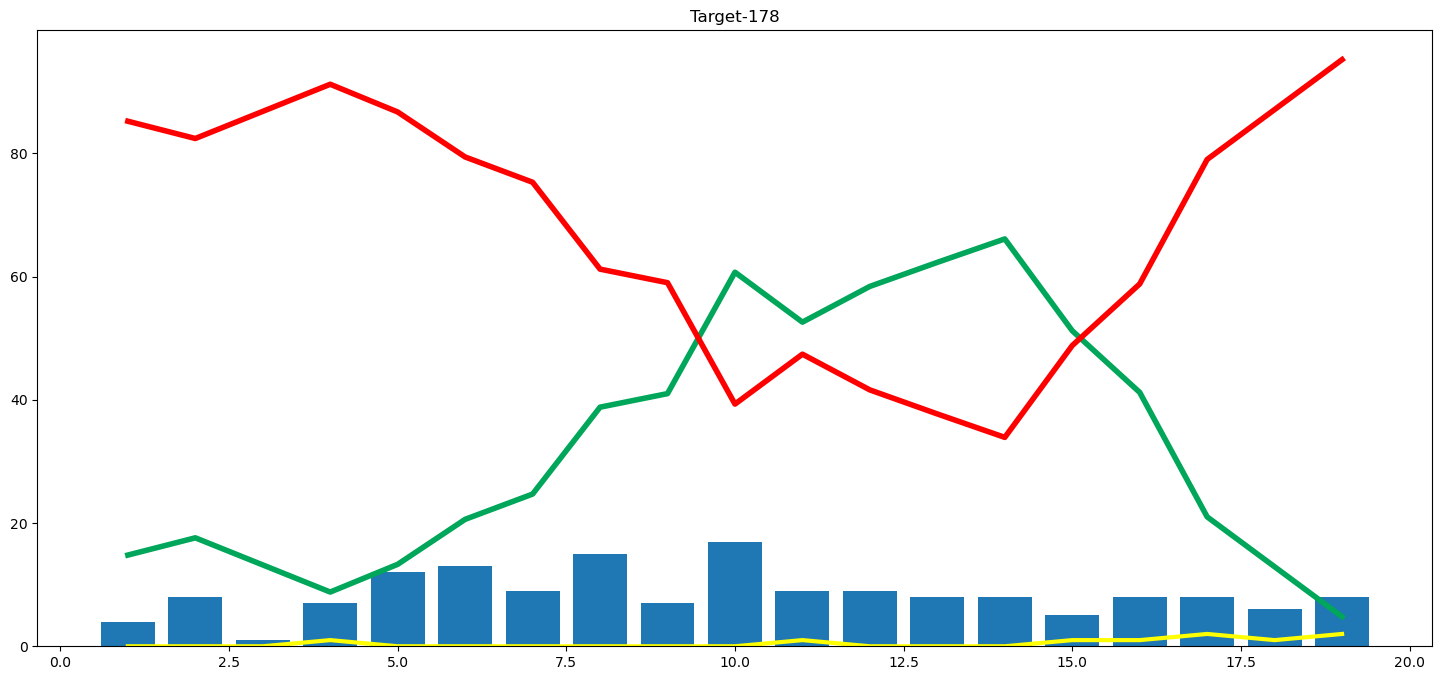

In [539]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [527]:
teams

['Sunrisers Hydrabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knit Riders',
 'Kings XI Panjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [529]:
delivery_df['city'].unique()

array(['Bangalore', 'Mumbai', 'Delhi', 'Chennai', 'Jaipur', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'Johannesburg',
       'East London', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Kolkata',
       'Sharjah', nan, 'Abu Dhabi', 'Ranchi', 'Raipur', 'Pune',
       'Visakhapatnam', 'Bengaluru', 'Hyderabad'], dtype=object)

In [531]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))